In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import sys
sys.path.append('sim_code/')

#for nice plots
fig_width_pt=347.5
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/(2.0)    # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inlw=2ches
fig_height = fig_width*golden_mean      # height in inches
fig_size = [fig_width,fig_height]
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath} \usepackage{amssymb} \usepackage{siunitx}"]
params = {#'backend': 'pdf',\n",
            'text.usetex': True,
            'font.weight': 'bold',
            'axes.linewidth' : 1.5,
            'axes.labelsize': 18,
            'font.size': 18,
            'legend.fontsize': 16,
            'xtick.labelsize': 18,
            'ytick.direction':'in',
            'xtick.direction':'in',
            'ytick.labelsize': 18,
            'font.family' : 'lmodern',
            #'text.latex.unicode': True,
            'figure.figsize': fig_size}
plt.rcParams.update(params)
from matplotlib.backends.backend_pdf import PdfPages


/home/hendrykn123/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/hendrykn123/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (
<ipython-input-1-c7838662d9d4>:16: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath} \usepackage{amssymb} \usepackage{siunitx}"]


No handles with labels found to put in legend.
/home/hendrykn123/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/hendrykn123/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'f [THz]')

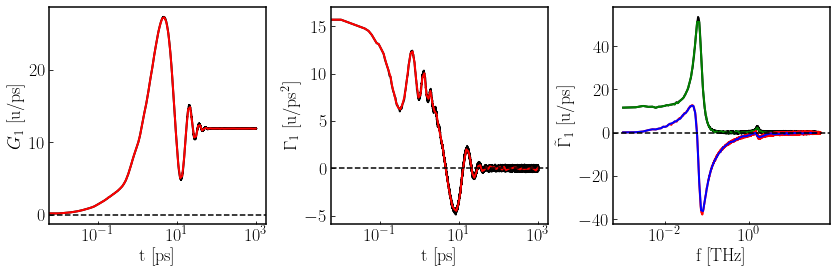

In [2]:
from scipy import integrate
from filon_fft import *

dt = 0.01
length = 1000
t = np.arange(0,length,dt)
k = 10
k2 = 5
k3 = 1

tau = 10
tau2 = 1
tau3 = 0.01

w = .4
w2 = 10
w3 = 1

kernel = k*np.exp(-t/tau)*(np.cos(w*t) + 1/(w*tau)*np.sin(w*t)) 
kernel+=k2*np.exp(-t/tau2)*(np.cos(w2*t) + 1/(w2*tau2)*np.sin(w2*t))
kernel+=k3*np.exp(-t/tau3)*(np.cos(w3*t) + 1/(w3*tau3)*np.sin(w3*t))

ikernel = integrate.cumtrapz(kernel, t, initial=0)
std=0.1
noise = np.random.normal(0,std,(kernel.shape))
kernel+=noise
ikernel+=noise/10

start = 0
end =4.99
amount = 100

#create logspaced data
logsp = np.append(0,np.unique(np.logspace(start,end,amount).astype(int)))
t_logsp = t[logsp]
ikernel_logsp = ikernel[logsp]
kernel_logsp = kernel[logsp]

#FFT
n=len(kernel)
omega,kernel_ft = fourier_integrate(t,np.append(kernel[:n],np.zeros(len(kernel)-n)))
freqs=omega/2/np.pi
kernel_ft = kernel_ft[freqs >0]
freqs= freqs[freqs >0]
#kernel_ft = gaussian_filter1d(np.real(kernel_ft), 5) + 1j*gaussian_filter1d(np.imag(kernel_ft), 5) 

start = 0
end =4.59
amount = 100
logsp = np.append(0,np.unique(np.logspace(start,end,amount).astype(int)))
freqs_logsp = freqs[logsp]
kernel_ft_logsp = kernel_ft[logsp]


fig, ax = plt.subplots(1,3, figsize=(14,4))
plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 0.3)

ax[0].plot(t,ikernel,color='k',lw=2, linestyle='-')
ax[0].plot(t_logsp,ikernel_logsp,color='r',lw=2, linestyle='-')
ax[0].set_xscale("log")
ax[0].axhline(y = 0, linestyle = '--', color = 'k')
ax[0].set_ylabel(r'$G_{1}$ [u/ps]')
ax[0].set_xlabel('t [ps]')
ax[0].legend(loc="best",frameon=False,ncol=1)

ax[1].plot(t,kernel,color='k',lw=2, linestyle='-')
ax[1].plot(t_logsp,kernel_logsp,color='r',lw=2, linestyle='-')
ax[1].set_xscale("log")
ax[1].axhline(y = 0, linestyle = '--', color = 'k')
ax[1].set_ylabel(r'$\Gamma_{1}$ [u/ps$^2$]')
ax[1].set_xlabel('t [ps]')

ax[2].plot(freqs,kernel_ft,color='k',label="Re",lw=2, linestyle='-')
ax[2].plot(freqs_logsp,kernel_ft_logsp,color='g',label="Re",lw=2, linestyle='-')
ax[2].plot(freqs,np.imag(kernel_ft),color='r',label="Im",lw=2, linestyle='-')
ax[2].plot(freqs_logsp,np.imag(kernel_ft_logsp),color='b',label="Im",lw=2, linestyle='-')
ax[2].set_xscale("log")
ax[2].axhline(y = 0, linestyle = '--', color = 'k')
ax[2].set_ylabel(r'$\tilde{\Gamma}_{1}$ [u/ps]')
ax[2].set_xlabel('f [THz]')


11.883713783543017


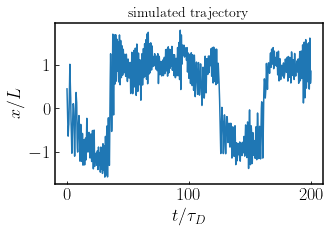

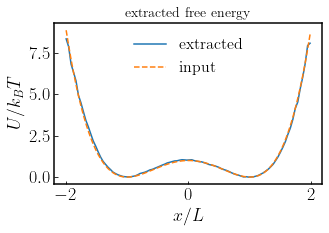

In [12]:
from gle_multi_exp_osc import *

nsteps=int(2e6)
 
kT=2.494
tau_D = 1
L = 1
dt=tau_D/100

pos = np.linspace(-4, 4, 100)
U0 = kT
fe = U0 * ((pos)**2 - 1)**2
fe_spline,force_bins,force_matrix = spline_fe_for_sim(pos,fe)

k = 10
k2 = 5
k3 = 1

tau = 10
tau2 = 1
tau3 = 0.01

w = .4
w2 = 10
w3 = 1

mass = 1

ks = np.array([k,k2,k3])
taus= np.array([tau,tau2,tau3])
ws= np.array([w,w2,w3])


mys=ks*(taus**-2 + ws**2)**-1
gammays=2*mys/taus
print(np.sum(gammays))
n_exp = len(ks)
x0=np.mean(0)
v0=np.random.normal(0.0,math.sqrt(kT/mass))
y0=np.zeros(n_exp)
w0=np.zeros(n_exp)

'''
for j in range(n_exp):
    y0[j]=random.gauss(x0,math.sqrt(kT*np.absolute(taus[j]/gammays[j])))
    w0[j]=random.gauss(0.0,math.sqrt(kT/mys[j]))
'''
    
x,vv,yy,ww = integrate_multi_exp_osc_arb_pot(nsteps, dt, mass, ks, mys, gammays, x0, y0, v0,w0, kT,force_bins,force_matrix)

start = 100
end = int(len(x)*1)

x = x[start:end] #equilibrium time
t = np.arange(0,len(x)*dt,dt)


plt.plot(t[:20000],x[:20000])
plt.title('simulated trajectory',fontsize=14)
plt.xlabel(r'$t/\tau_D$')
plt.ylabel(r'$x/L$')
plt.show()



hist,edges=np.histogram(x, bins=100, density=True)
pos=(edges[1:]+edges[:-1])/2

fe=-kT*np.log(hist); fe-=np.min(fe)

x2 = np.linspace(np.min(pos), np.max(pos), 100)
energy_real = U0 * ((x2)**2 - 1)**2


plt.plot(pos,fe/kT,label = 'extracted')
plt.plot(x2,energy_real/kT,'--', label = 'input')
plt.legend(loc='best',frameon = False)
plt.title('extracted free energy',fontsize=14)
plt.xlabel('$x/L$')
plt.ylabel('$U/k_BT$')
plt.show()

In [13]:
np.save('../test',x)